In [118]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity, mean_squared_error

# Загрузка изображения

(np.float64(-0.5), np.float64(1199.5), np.float64(674.5), np.float64(-0.5))

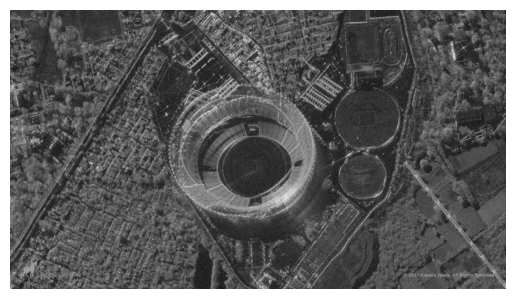

In [119]:
image = cv2.imread('sar_1.jpg')
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

plt.imshow(image_gray, cmap="gray")
plt.axis('off')

# Зашумить изображение

(np.float64(-0.5), np.float64(1199.5), np.float64(674.5), np.float64(-0.5))

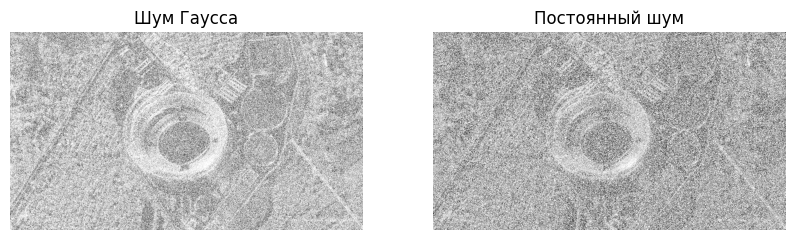

In [120]:
mean = 0
stddev = 100

noise_gauss = np.random.normal(mean, stddev, image_gray.shape).astype(np.uint8)
image_noise_gauss = cv2.add(image_gray, noise_gauss)

noise_uniform = np.random.uniform(-50, 50, image_gray.shape).astype(np.uint8)
image_noise_uniform = cv2.add(image_gray, noise_uniform)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image_noise_gauss, cmap="gray")
plt.title('Шум Гаусса')
plt.axis('off')


plt.subplot(1, 2, 2)
plt.imshow(image_noise_uniform, cmap="gray")
plt.title('Постоянный шум')
plt.axis('off')

# Протестировать фильтры (М/Г/Б/Н) с разными параметрами

Фильтры для шума Гаусса
Результаты:
Гаусса 3x3 сигма=0: MSE=13339.27, SSIM=0.2418
Гаусса 5x5 сигма=0: MSE=13131.01, SSIM=0.2762
Гаусса 7x7 сигма=0: MSE=13049.05, SSIM=0.2892
Гаусса 3x3 сигма=1: MSE=13285.75, SSIM=0.2484
Гаусса 3x3 сигма=2: MSE=13249.63, SSIM=0.2481
Гаусса 5x5 сигма=1: MSE=13153.73, SSIM=0.2720
Гаусса 5x5 сигма=2: MSE=13063.79, SSIM=0.2780
Гаусса 7x7 сигма=1: MSE=13143.70, SSIM=0.2738
Гаусса 7x7 сигма=2: MSE=13034.40, SSIM=0.2818
Медианный 3x3: MSE=16545.76, SSIM=0.1481
Медианный 5x5: MSE=16506.30, SSIM=0.1780
Медианный 7x7: MSE=16481.83, SSIM=0.1916
Билатериальный d=9 сигма=25: MSE=16322.15, SSIM=0.0944
Билатериальный d=9 сигма=75: MSE=14535.10, SSIM=0.1586
Билатериальный d=15 сигма=100: MSE=14026.73, SSIM=0.1747
Нелокальне средние h=10: MSE=16437.00, SSIM=0.0909
Нелокальне средние h=20: MSE=16427.20, SSIM=0.0918
Нелокальне средние h=30: MSE=15922.40, SSIM=0.1065


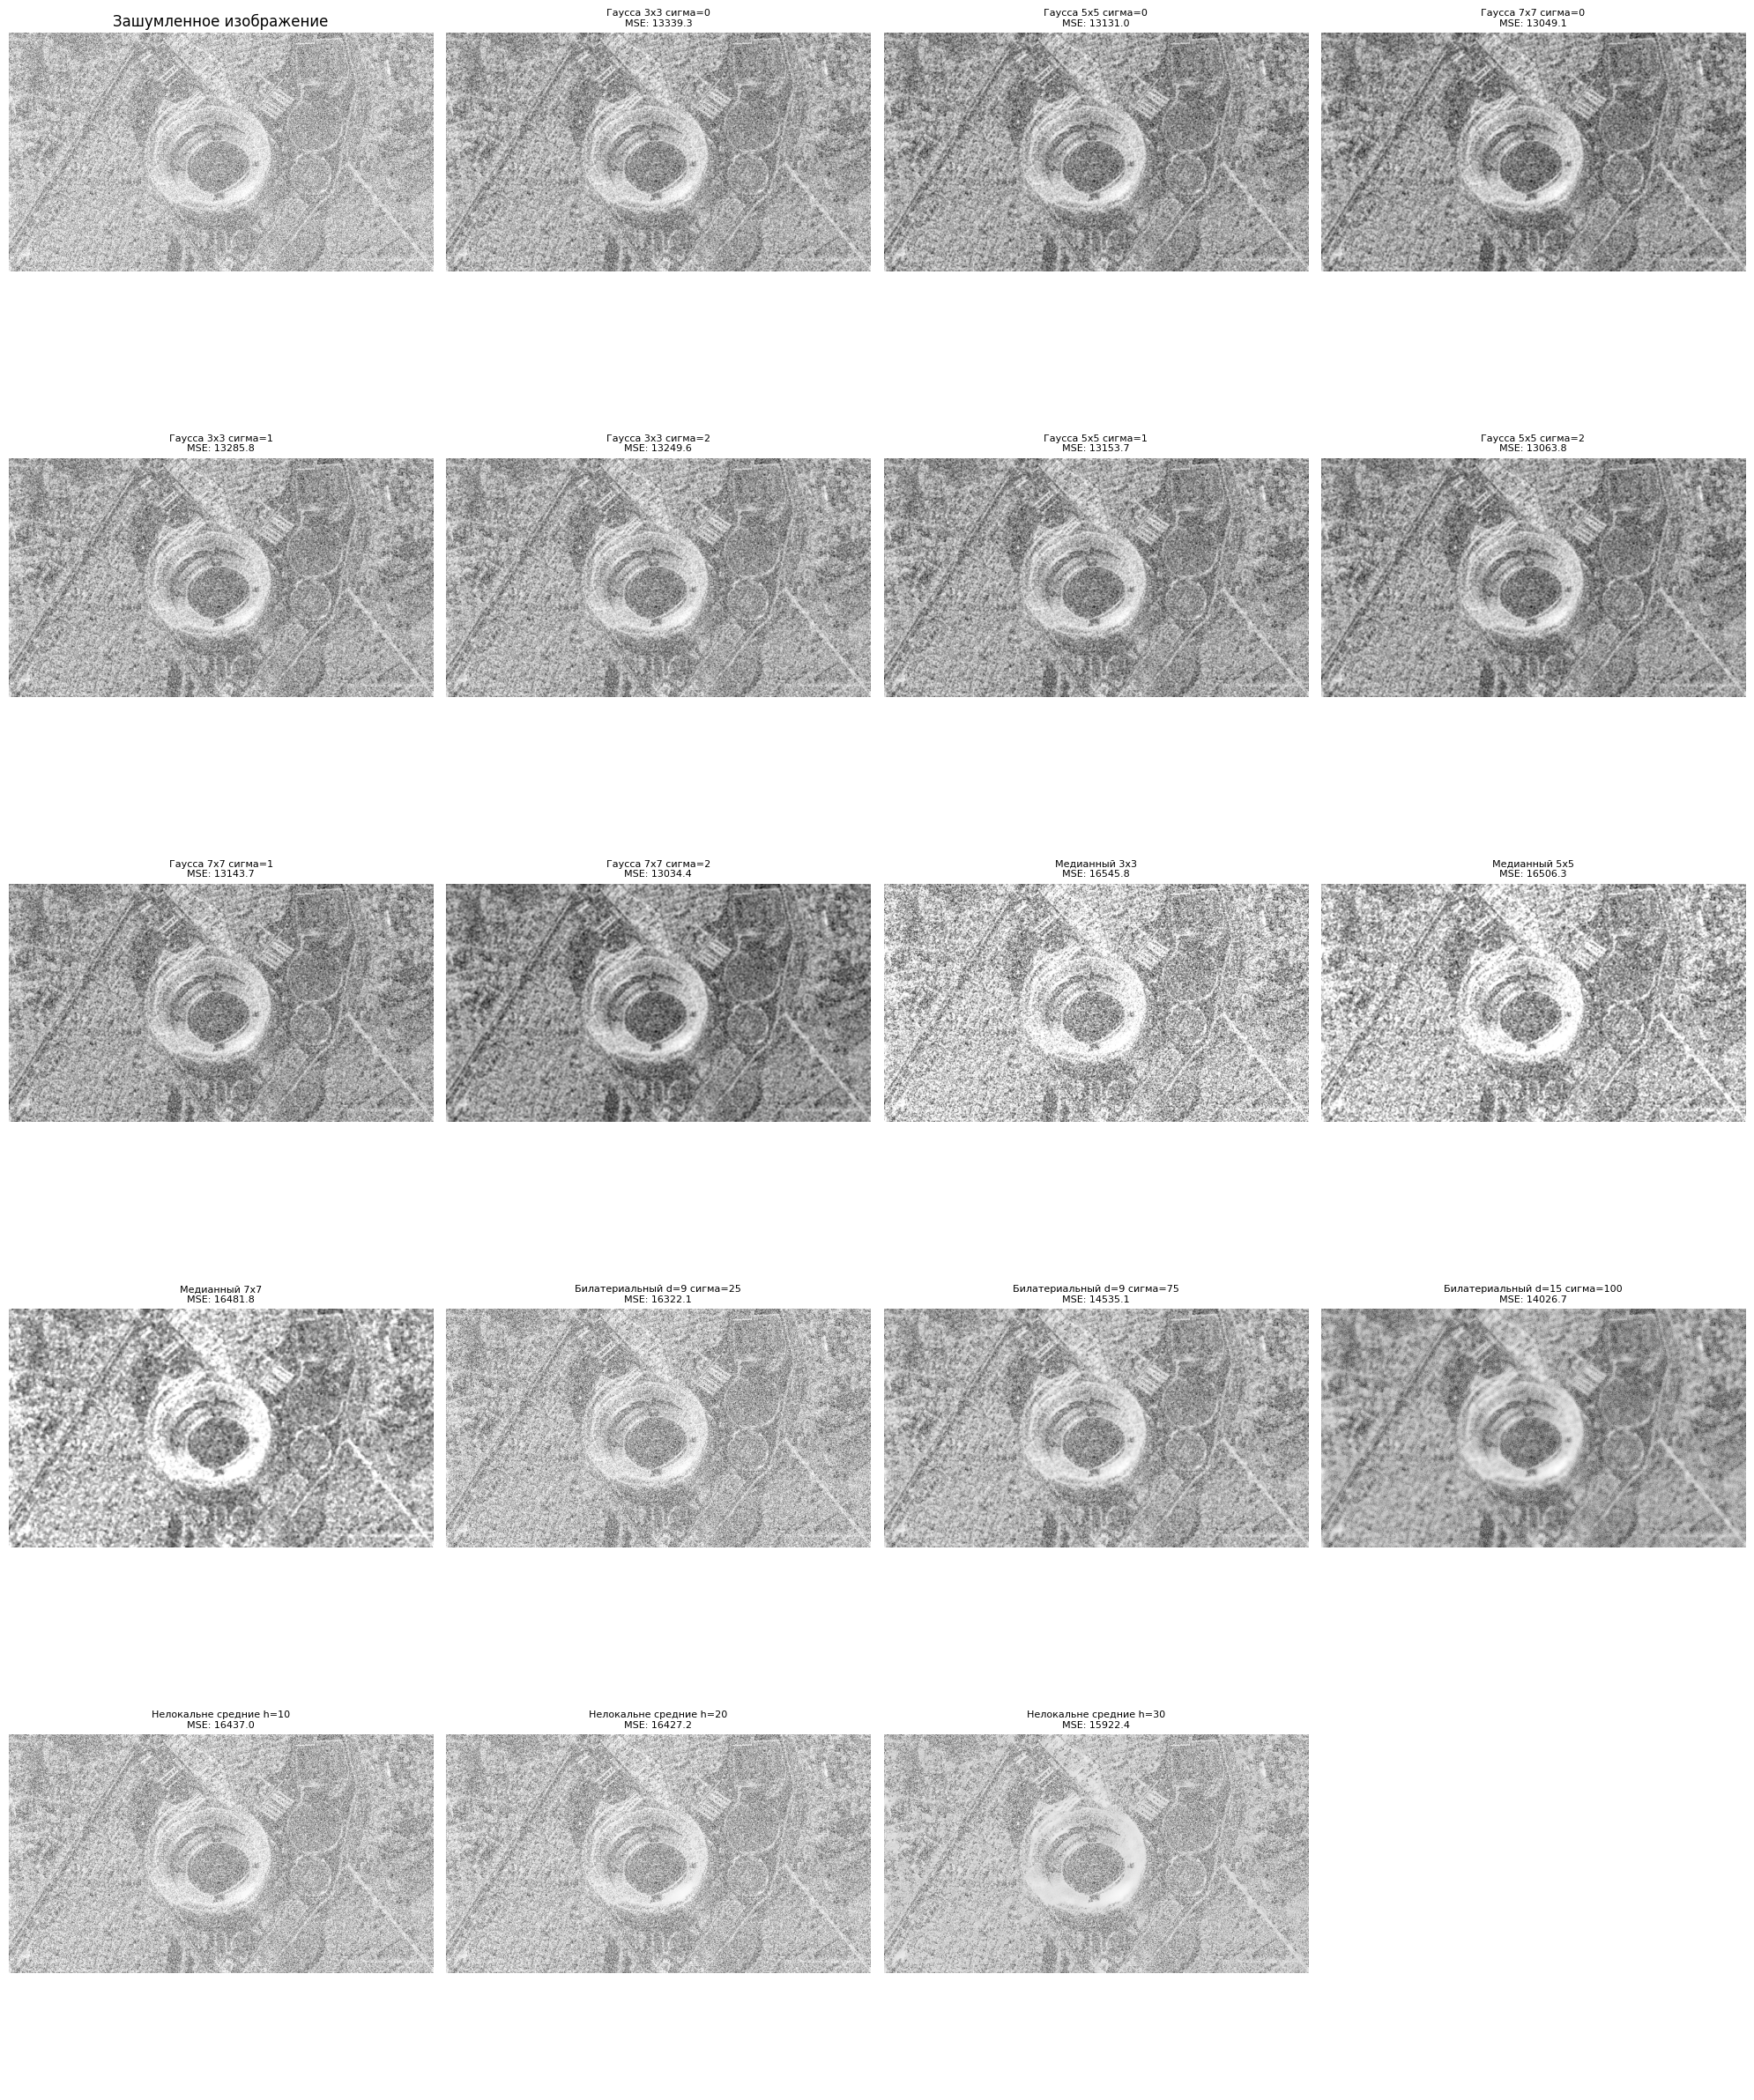



Фильтры для постоянного шума
Результаты:
Гаусса 3x3 сигма=0: MSE=10942.47, SSIM=0.1753
Гаусса 5x5 сигма=0: MSE=10569.41, SSIM=0.2126
Гаусса 7x7 сигма=0: MSE=10398.52, SSIM=0.2371
Гаусса 3x3 сигма=1: MSE=10852.78, SSIM=0.1820
Гаусса 3x3 сигма=2: MSE=10780.69, SSIM=0.1839
Гаусса 5x5 сигма=1: MSE=10613.54, SSIM=0.2071
Гаусса 5x5 сигма=2: MSE=10419.21, SSIM=0.2268
Гаусса 7x7 сигма=1: MSE=10594.69, SSIM=0.2093
Гаусса 7x7 сигма=2: MSE=10346.98, SSIM=0.2411
Медианный 3x3: MSE=16304.87, SSIM=0.0540
Медианный 5x5: MSE=16319.37, SSIM=0.0524
Медианный 7x7: MSE=16277.75, SSIM=0.0570
Билатериальный d=9 сигма=25: MSE=16110.46, SSIM=0.0476
Билатериальный d=9 сигма=75: MSE=14059.98, SSIM=0.0751
Билатериальный d=15 сигма=100: MSE=12309.40, SSIM=0.0965
Нелокальне средние h=10: MSE=16164.45, SSIM=0.0569
Нелокальне средние h=20: MSE=16163.07, SSIM=0.0570
Нелокальне средние h=30: MSE=16081.85, SSIM=0.0604


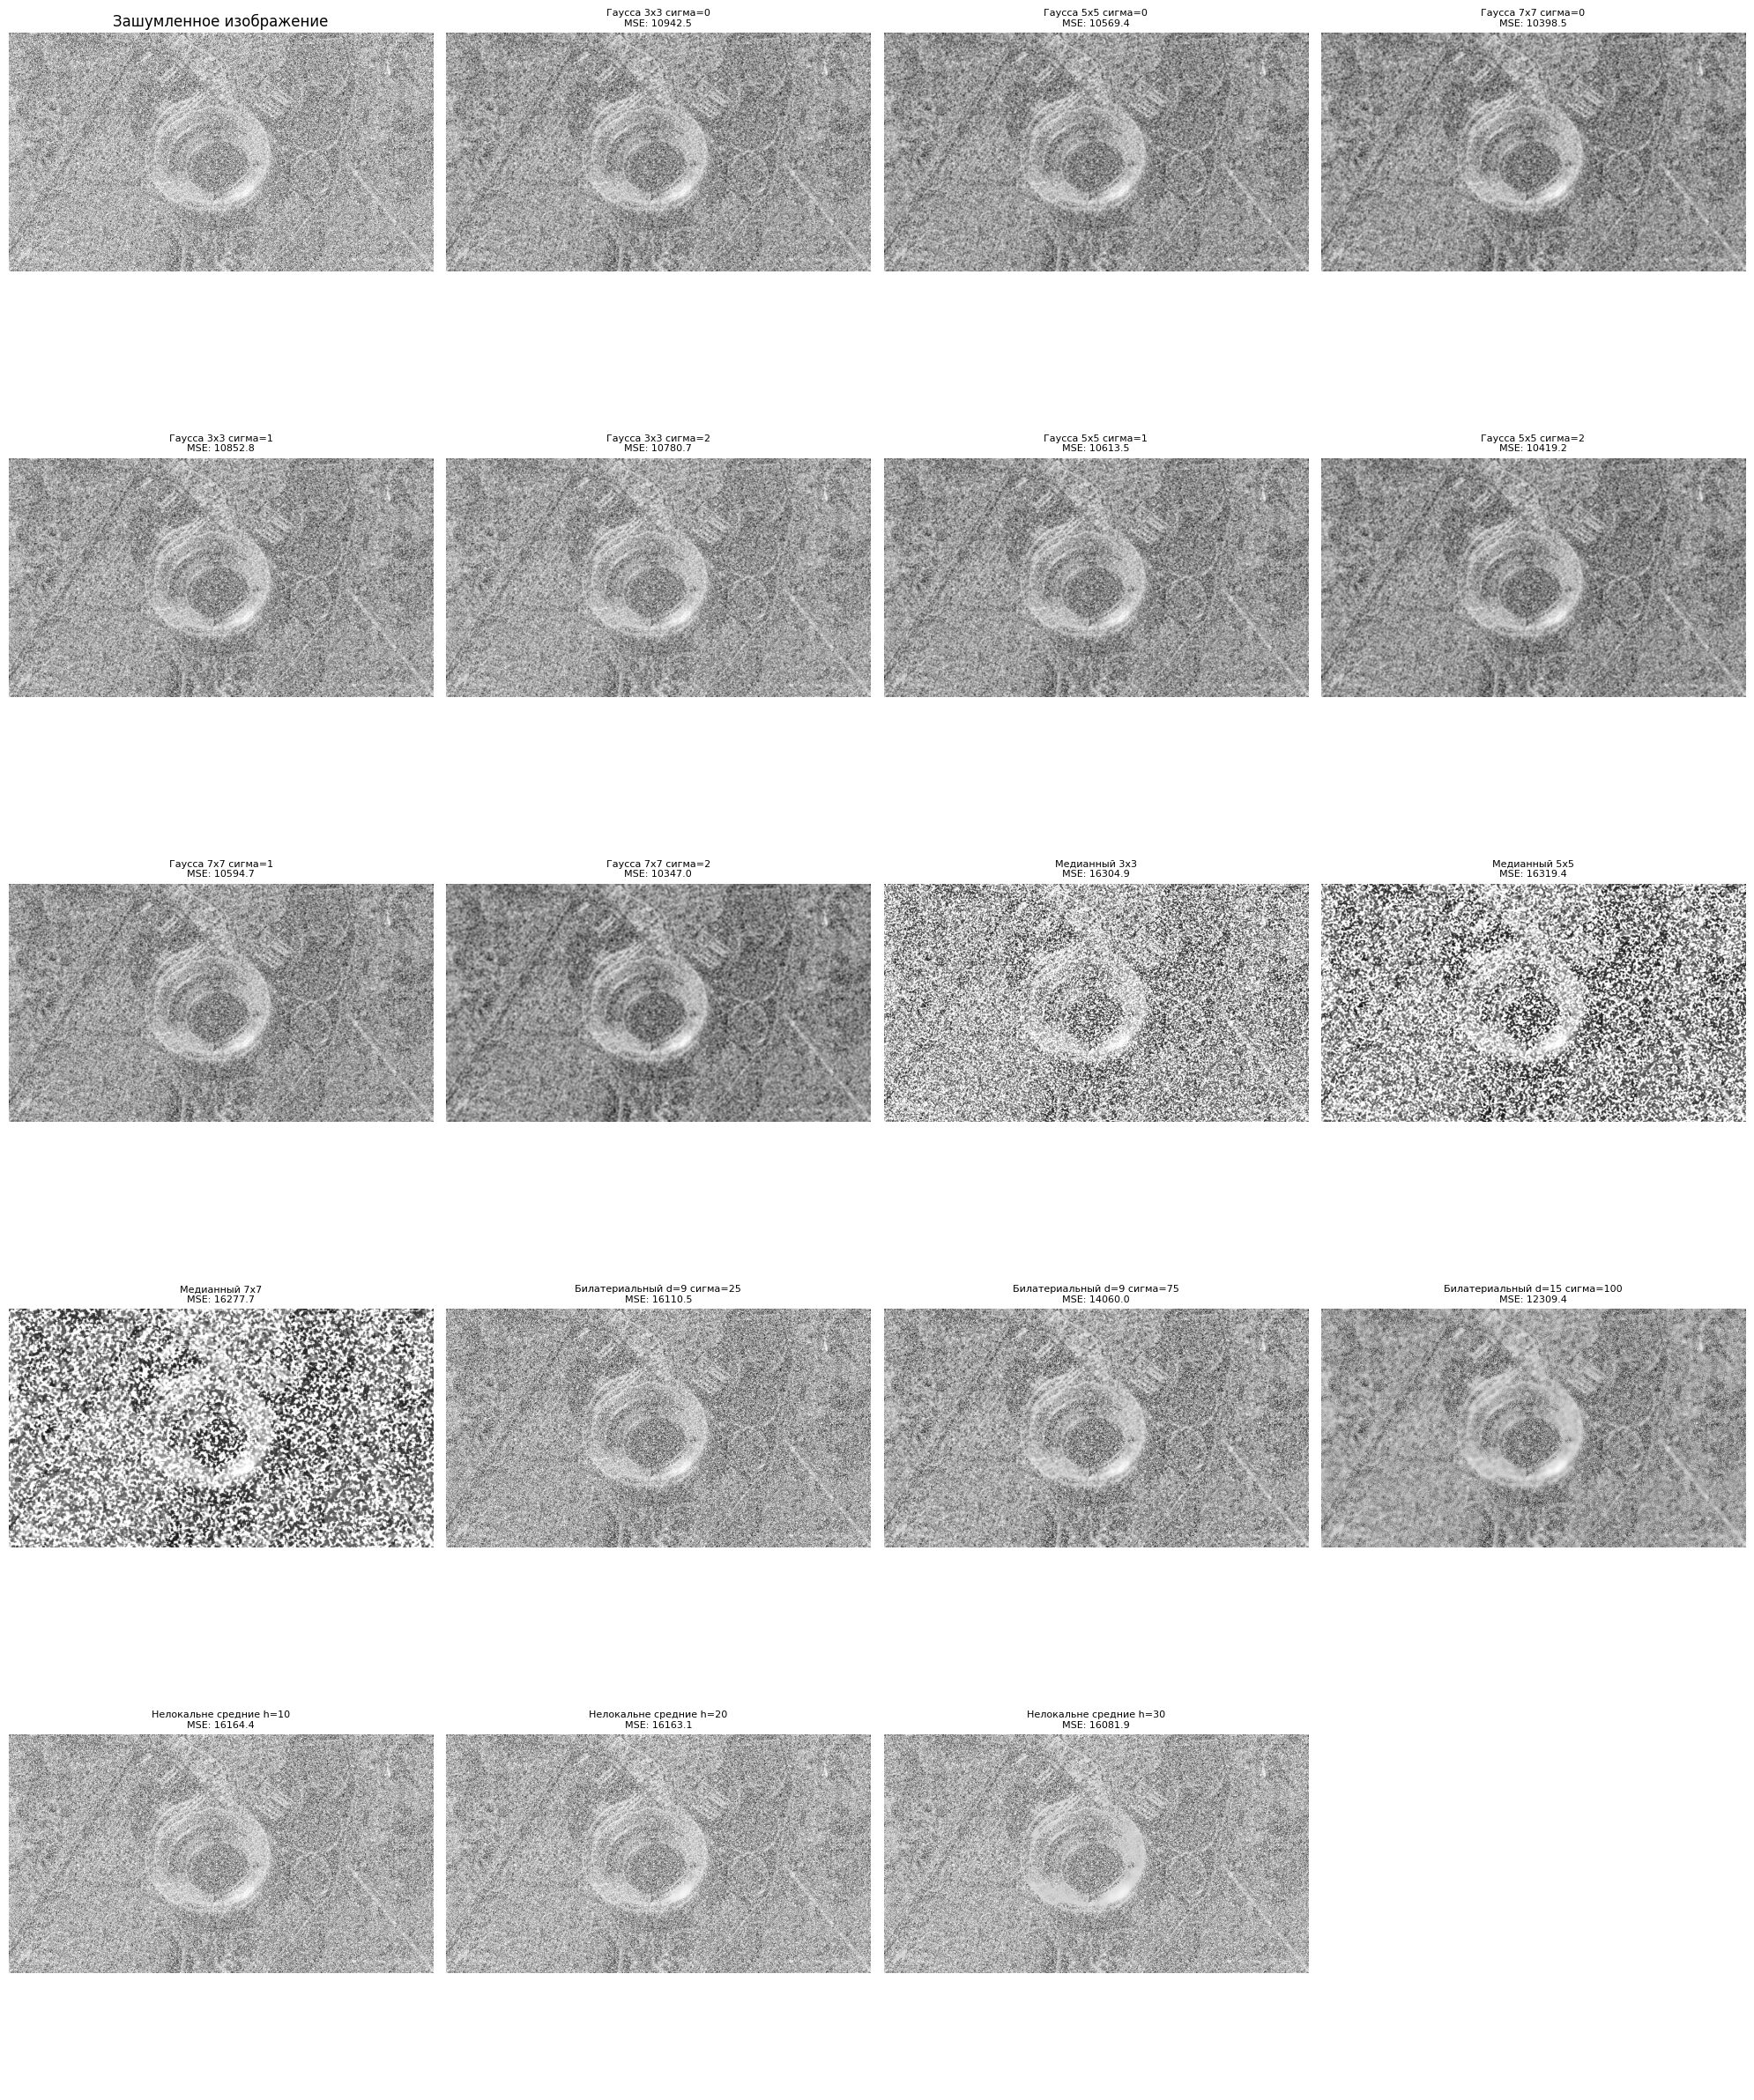

In [121]:
def filter_test(noisy_image, clean_image):
    filters_to_test = [
        ('Гаусса 3x3 сигма=0', cv2.GaussianBlur(noisy_image, (3, 3), 0)),
        ('Гаусса 5x5 сигма=0', cv2.GaussianBlur(noisy_image, (5, 5), 0)),
        ('Гаусса 7x7 сигма=0', cv2.GaussianBlur(noisy_image, (7, 7), 0)),
        ('Гаусса 3x3 сигма=1', cv2.GaussianBlur(noisy_image, (3, 3), 1)),
        ('Гаусса 3x3 сигма=2', cv2.GaussianBlur(noisy_image, (3, 3), 2)),
        ('Гаусса 5x5 сигма=1', cv2.GaussianBlur(noisy_image, (5, 5), 1)),
        ('Гаусса 5x5 сигма=2', cv2.GaussianBlur(noisy_image, (5, 5), 2)),
        ('Гаусса 7x7 сигма=1', cv2.GaussianBlur(noisy_image, (7, 7), 1)),
        ('Гаусса 7x7 сигма=2', cv2.GaussianBlur(noisy_image, (7, 7), 2)),
        
        ('Медианный 3x3', cv2.medianBlur(noisy_image, 3)),
        ('Медианный 5x5', cv2.medianBlur(noisy_image, 5)),
        ('Медианный 7x7', cv2.medianBlur(noisy_image, 7)),
        
        ('Билатериальный d=9 сигма=25', cv2.bilateralFilter(noisy_image, 9, 25, 25)),
        ('Билатериальный d=9 сигма=75', cv2.bilateralFilter(noisy_image, 9, 75, 75)),
        ('Билатериальный d=15 сигма=100', cv2.bilateralFilter(noisy_image, 15, 100, 100)),
        
        ('Нелокальне средние h=10', cv2.fastNlMeansDenoising(noisy_image, h=10)),
        ('Нелокальне средние h=20', cv2.fastNlMeansDenoising(noisy_image, h=20)),
        ('Нелокальне средние h=30', cv2.fastNlMeansDenoising(noisy_image, h=30))
    ]
    results = {}

    print("Результаты:")
    
    for filter_name, filtered_image in filters_to_test:
        mse = mean_squared_error(clean_image, filtered_image)
        ssim = structural_similarity(clean_image, filtered_image)
        
        print(f"{filter_name}: MSE={mse:.2f}, SSIM={ssim:.4f}")
        
        results[filter_name] = {
            'image': filtered_image,
            'mse': mse,
            'ssim': ssim
        }
    return results
def visualize(noisy_image, results):
    n_filters = len(results)
    n_cols = 4
    n_rows = (n_filters + n_cols) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5 * n_rows))
    axes = axes.flatten()
    
    axes[0].imshow(noisy_image, cmap='gray')
    axes[0].set_title('Зашумленное изображение')
    axes[0].axis('off')
    
    for idx, (filter_name, result) in enumerate(results.items(), 1):
        if idx < len(axes):
            axes[idx].imshow(result['image'], cmap='gray')
            axes[idx].set_title(f'{filter_name}\nMSE: {result["mse"]:.1f}', fontsize=8)
            axes[idx].axis('off')
    
    for idx in range(len(results) + 1, len(axes)):
        axes[idx].axis('off')
        
    plt.tight_layout()
    plt.show()
print("Фильтры для шума Гаусса")

results_gauss = filter_test(image_noise_gauss, image_gray)
visualize(image_noise_gauss, results_gauss)

print("\n")
print("Фильтры для постоянного шума")

results_uniform = filter_test(image_noise_uniform, image_gray)
visualize(image_noise_uniform, results_uniform)